In [119]:
# 1. Data Exploration	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
df=pd.read_csv('Titanic_train.csv') #importing th dataset
df.info() #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
df.shape # this gives the size of the dataset

(891, 12)

In [123]:
df.dtypes  # this gives the type of the features present in the dataset.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [125]:
# this gives the numerical columns in the dataset , from this we need to drop passenger id : beacuse it is just an identifier and is of no use to make predictions.
numerical_col=df.select_dtypes(include=["number"]).columns
numerical_col  

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [127]:
 # this gives the categorical columns in the dataset , from this we will be dropping name,ticket because of high cardinality and they are identifier so they do not affect the predictions. cabin has to be dropped because of more no of outliers.
categorical_col=df.select_dtypes(include=["object"]).columns
categorical_col 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [129]:
df.describe() # gives the sumary statistics of the features

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df_cleaned=df.copy()

In [133]:
df_cleaned[df_cleaned.duplicated()] # to check duplicated rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [135]:
df_cleaned.columns[df_cleaned.columns.duplicated()] # to check duplicated coluns

Index([], dtype='object')

In [137]:
# converting these columns to floats to avoid error while assigning upper extreme and lower extreme value at the time of handling errors, as these columns are int type initially.
df_cleaned['SibSp']=df_cleaned['SibSp'].astype(float)
df_cleaned['Parch']=df_cleaned['Parch'].astype(float)

In [139]:
df_cleaned.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [141]:
df_cleaned=df_cleaned.loc[:, ~df_cleaned.columns.isin(['PassengerId','Name', 'Ticket', 'Cabin'])] # isin checks whether the columns are in the dataset and drops them if true
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.0,7.2500,S
1,1,1,female,38.0,1.0,0.0,71.2833,C
2,1,3,female,26.0,0.0,0.0,7.9250,S
3,1,1,female,35.0,1.0,0.0,53.1000,S
4,0,3,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0.0,13.0000,S
887,1,1,female,19.0,0.0,0.0,30.0000,S
888,0,3,female,NaN,1.0,2.0,23.4500,S
889,1,1,male,26.0,0.0,0.0,30.0000,C


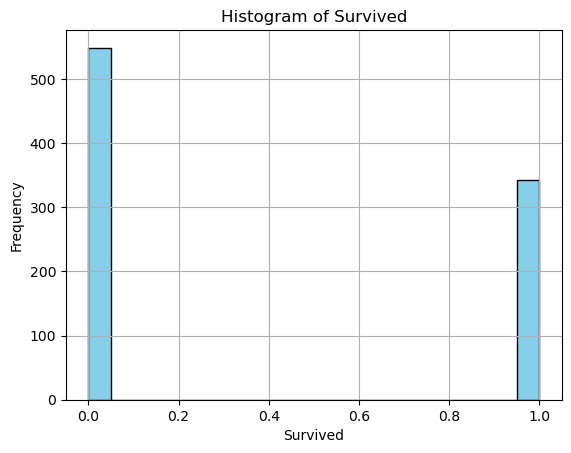

Skewness: 0.48
negatively skewed


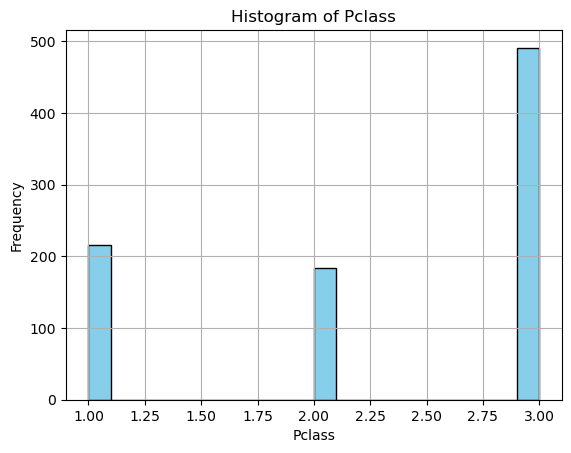

Skewness: -0.63
negatively skewed


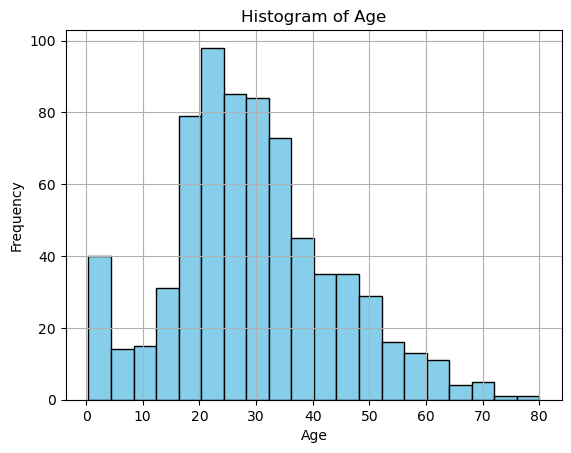

Skewness: nan
negatively skewed


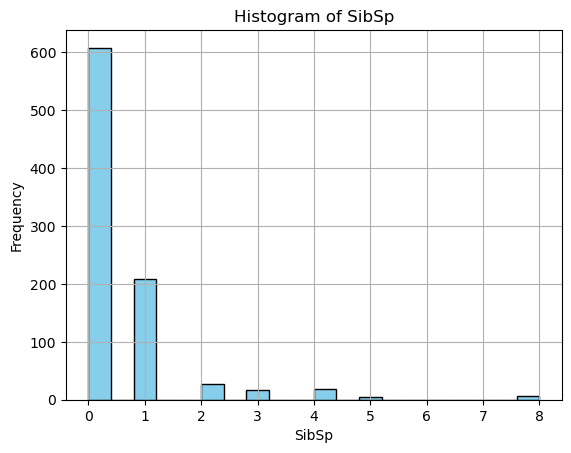

Skewness: 3.69
positively skewed


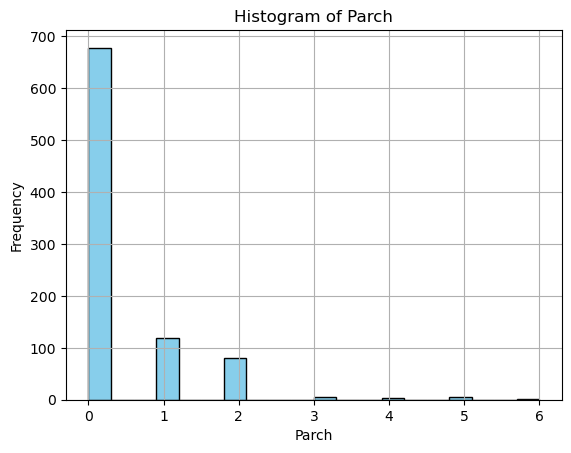

Skewness: 2.74
positively skewed


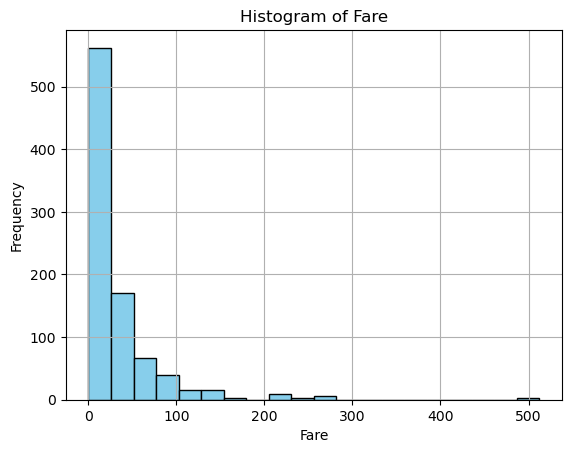

Skewness: 4.78
positively skewed


In [143]:
# visualizations histograms
num_col=df_cleaned.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df_cleaned[col]) #calculating skewness of each histogram
    
    df_cleaned[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

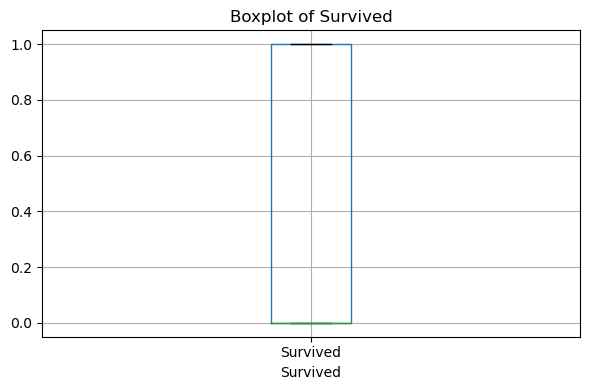

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


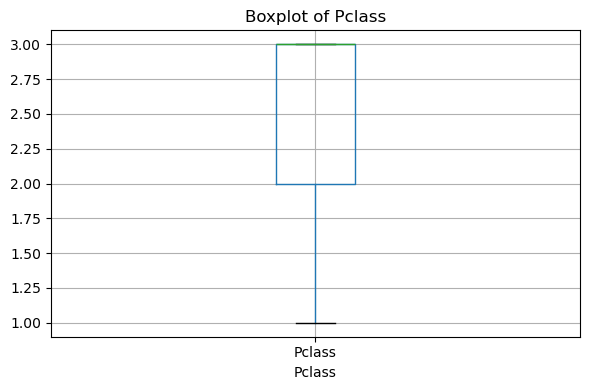

Outliers detected: 0
Lower extreme: 0.5
Upper extreme: 4.5


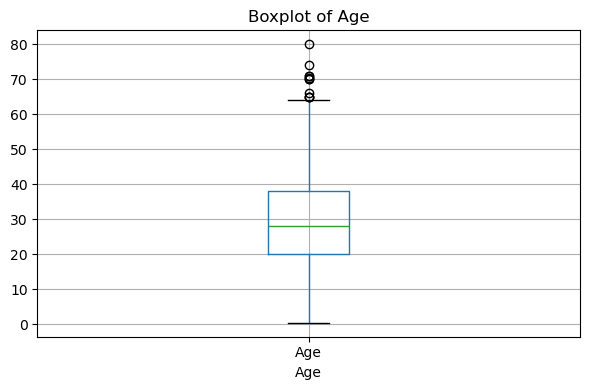

Outliers detected: 11
Lower extreme: -6.6875
Upper extreme: 64.8125


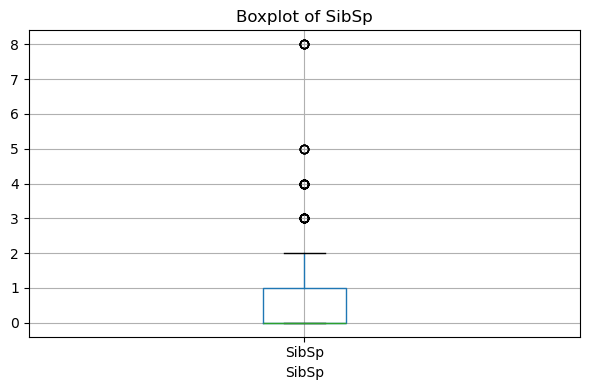

Outliers detected: 46
Lower extreme: -1.5
Upper extreme: 2.5


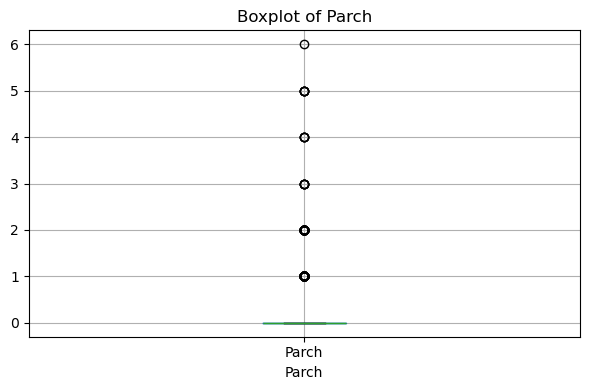

Outliers detected: 213
Lower extreme: 0.0
Upper extreme: 0.0


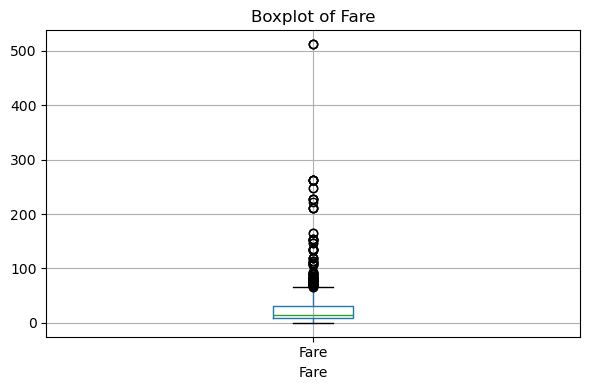

Outliers detected: 116
Lower extreme: -26.724
Upper extreme: 65.6344


In [144]:
# boxplots
for col in num_col:
    series = df_cleaned[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

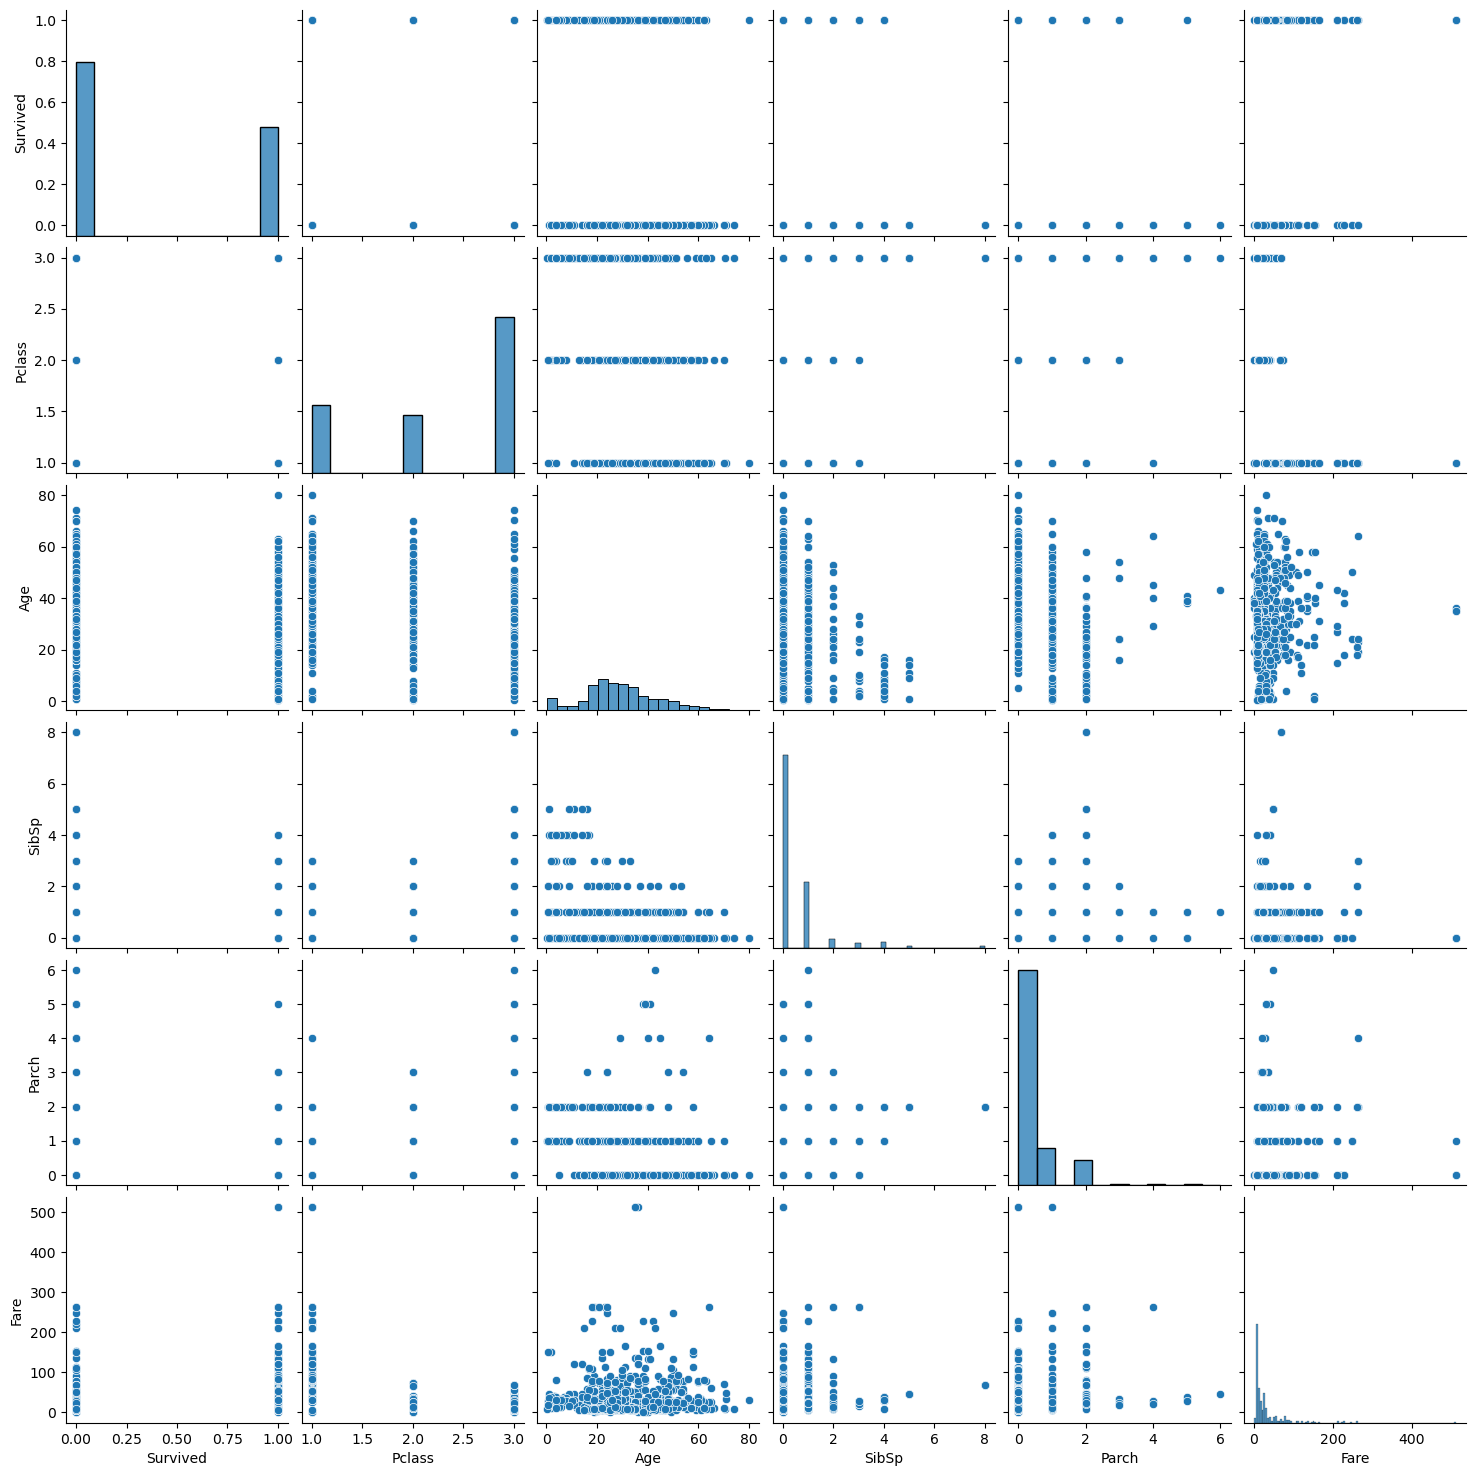

In [145]:
sns.pairplot(df_cleaned)

In [146]:
# 2. Data preprocessing
df_cleaned.isnull().sum() #this gives the no of null or missing values in each column, we can see cabin has ore no of outliers

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [147]:
# handling the missing values of age column by imputing them with median because age column has outliers
age_median=df_cleaned.loc[:,'Age'].median()
df_cleaned.loc[:,'Age']=df_cleaned.loc[:,'Age'].fillna(age_median)

In [148]:
df_cleaned=df_cleaned.dropna() #there are only 2 missing values in embarked thus dropping them
df_cleaned.reset_index(drop=True) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0.0,7.2500,S
1,1,1,female,38.0,1.0,0.0,71.2833,C
2,1,3,female,26.0,0.0,0.0,7.9250,S
3,1,1,female,35.0,1.0,0.0,53.1000,S
4,0,3,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0.0,0.0,13.0000,S
885,1,1,female,19.0,0.0,0.0,30.0000,S
886,0,3,female,28.0,1.0,2.0,23.4500,S
887,1,1,male,26.0,0.0,0.0,30.0000,C


In [149]:

df_cleaned.isnull().sum()  # checking if there are any missing values after handling them

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [150]:
# handling outliers
# IQR method to cap outliers 
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    
    Q1 = df_cleaned.loc[:,col].quantile(0.25)
    Q3 = df_cleaned.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df_cleaned.loc[df_cleaned.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df_cleaned.loc[df_cleaned.loc[:,col] < lower_bound, col] = lower_bound
    
    

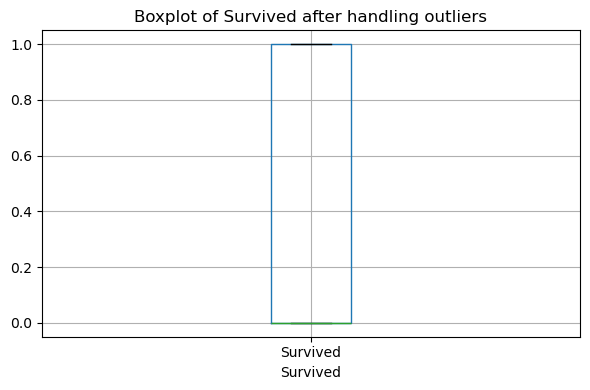

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


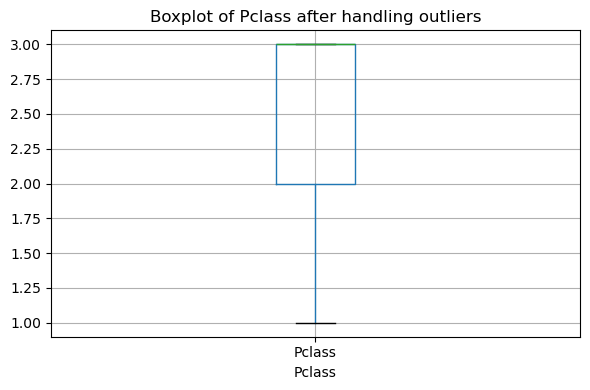

Outliers detected: 0
Lower extreme: 0.5
Upper extreme: 4.5


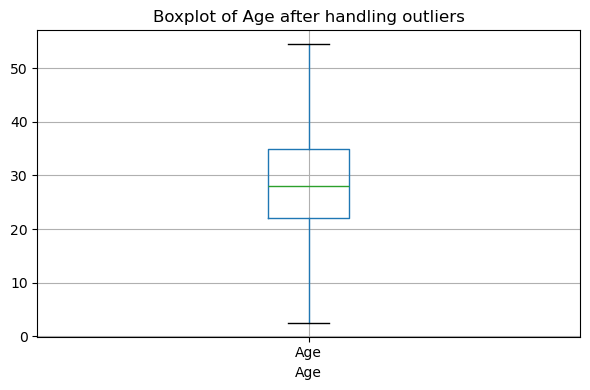

Outliers detected: 0
Lower extreme: 2.5
Upper extreme: 54.5


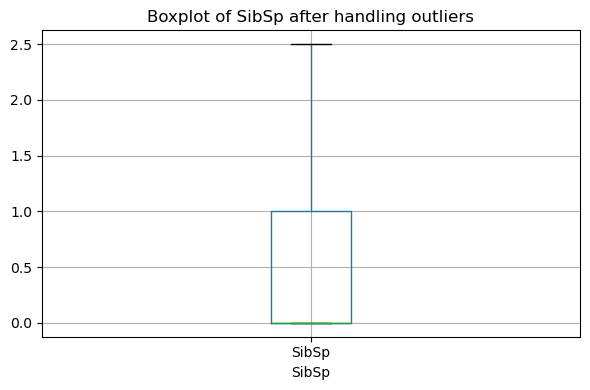

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


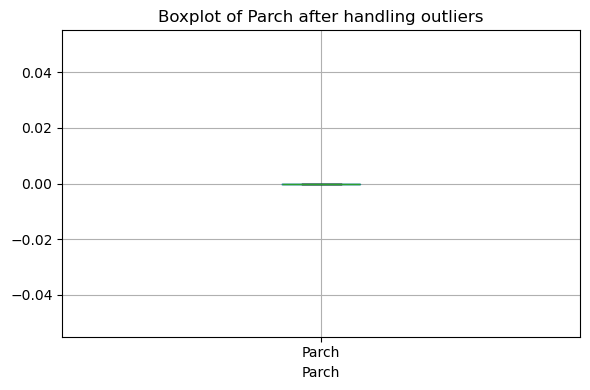

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


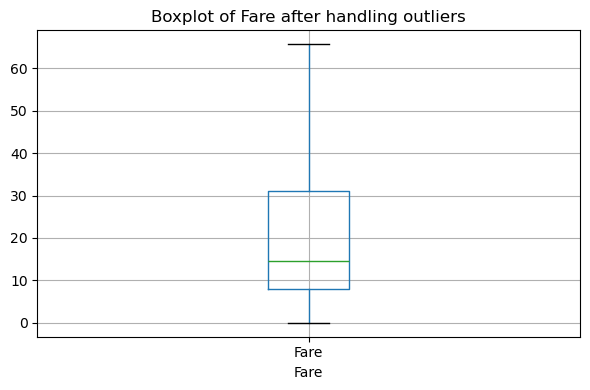

Outliers detected: 0
Lower extreme: -26.7605
Upper extreme: 65.6563


In [151]:
# plotting boxplots to check the presence of outliers after handling them.

for col in num_col:
    series = df_cleaned[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [152]:
# encoding categorical variables
cat_col=df_cleaned.select_dtypes(include=["object"]).columns # selecting only categorical columns
# Applying one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_col).astype(int)

# displaying the transformed dataset
df_cleaned.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,65,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


In [240]:
df_cleaned.to_csv(r'C:\Users\jeshw\Desktop\Logistic Regression\Titanic_train_cleaned.csv') # saving the cleaned data to use it while creating streamlit app.

In [153]:
# from the correlation we can see that there is no high correlation between independent variables .
df_cleaned.corr() 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.064812,0.056121,NaN,0.313856,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.336694,-0.002613,NaN,-0.715617,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,-0.064812,-0.336694,1.000000,-0.225132,NaN,0.139047,-0.078983,0.078983,0.031914,-0.034102,-0.006495
SibSp,0.056121,-0.002613,-0.225132,1.000000,NaN,0.364509,0.179993,-0.179993,-0.011103,-0.037128,0.033100
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.313856,-0.715617,0.139047,0.364509,NaN,1.000000,0.230145,-0.230145,0.266350,-0.173649,-0.124060
Sex_female,0.541585,-0.127741,-0.078983,0.179993,NaN,0.230145,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,-0.541585,0.127741,0.078983,-0.179993,NaN,-0.230145,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,0.169966,-0.245733,0.031914,-0.011103,NaN,0.266350,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.034102,-0.037128,NaN,-0.173649,0.075217,-0.075217,-0.148646,1.000000,-0.499261


In [154]:
# 3. Model Building:
import pandas as pd
from sklearn.linear_model import LogisticRegression
# Dividing our data into input and output variables
X = df_cleaned.iloc[:,1:]
Y = df_cleaned.iloc[:,0]

In [155]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1,0,7,0,1,0,0,1
1,1,38,1,0,65,1,0,1,0,0
2,3,26,0,0,7,1,0,0,0,1
3,1,35,1,0,53,1,0,0,0,1
4,3,35,0,0,8,0,1,0,0,1


In [156]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [157]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter=500)
classifier.fit(X,Y)

LogisticRegression(max_iter=500)

In [158]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [159]:
classifier.predict_proba(X)

array([[0.91999296, 0.08000704],
       [0.08179478, 0.91820522],
       [0.41135656, 0.58864344],
       ...,
       [0.49596084, 0.50403916],
       [0.39181091, 0.60818909],
       [0.88666327, 0.11333673]])

In [160]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict_proba(X)[:,1],
                         'y_predictions':y_pred})

In [161]:
y_pred_df

,actual,predicted_prob,y_predictions
0,0,0.080007,0
1,1,0.918205,1
2,1,0.588643,1
3,1,0.883839,1
4,0,0.070230,0
...,...,...,...
886,0,0.233501,0
887,1,0.946532,1
888,0,0.504039,1
889,1,0.608189,1


In [163]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score


In [164]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[469  80]
 [103 237]]


In [165]:
accuracy_score(Y,y_pred)

0.7941507311586051

In [166]:
#Classification report (perfomance of the model with the training data)
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.72       340

    accuracy                           0.79       889
   macro avg       0.78      0.78      0.78       889
weighted avg       0.79      0.79      0.79       889



Text(0, 0.5, 'True Positive Rate')

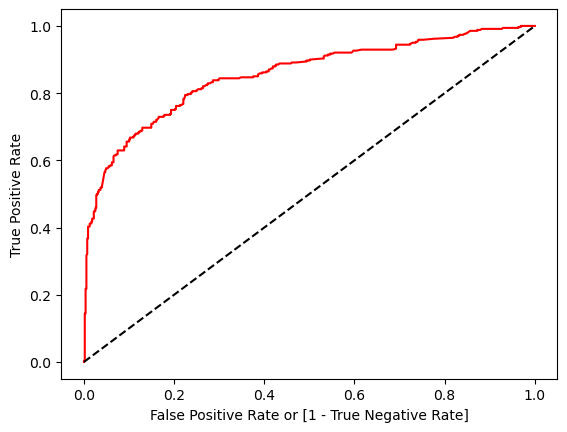

In [167]:
# plotting roc curve for training data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [168]:
# 4. Model Evaluation:
# importing the test data
test=pd.read_csv('Titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
test_cleaned=test.copy()

In [170]:
test_cleaned[test_cleaned.duplicated()] # checking duplicated rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [171]:
test_cleaned.columns[test_cleaned.columns.duplicated()] # checking duplicated columns

Index([], dtype='object')

In [172]:
test_cleaned.shape

(418, 11)

In [173]:
test_cleaned.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [175]:
test_cleaned.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [176]:
test_cleaned['SibSp']=test_cleaned['SibSp'].astype(float)
test_cleaned['Parch']=test_cleaned['Parch'].astype(float)

In [177]:
test_cleaned.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [178]:
test_cleaned=test_cleaned.loc[:, ~test_cleaned.columns.isin(['PassengerId','Name', 'Ticket', 'Cabin'])] # isin checks whether the columns are in the dataset and drops them if true
test_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0.0,0.0,7.8292,Q
1,3,female,47.0,1.0,0.0,7.0000,S
2,2,male,62.0,0.0,0.0,9.6875,Q
3,3,male,27.0,0.0,0.0,8.6625,S
4,3,female,22.0,1.0,1.0,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0.0,0.0,8.0500,S
414,1,female,39.0,0.0,0.0,108.9000,C
415,3,male,38.5,0.0,0.0,7.2500,S
416,3,male,NaN,0.0,0.0,8.0500,S


In [179]:
# handling the missing values of age column by imputing them with median because age column has outliers
agem_median=test_cleaned.loc[:,'Age'].median()
test_cleaned.loc[:,'Age']=test_cleaned.loc[:,'Age'].fillna(agem_median)

In [180]:
test_cleaned=test_cleaned.dropna() #there is only 1 missing values in fare thus dropping them
test_cleaned.reset_index(drop=True) 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0.0,0.0,7.8292,Q
1,3,female,47.0,1.0,0.0,7.0000,S
2,2,male,62.0,0.0,0.0,9.6875,Q
3,3,male,27.0,0.0,0.0,8.6625,S
4,3,female,22.0,1.0,1.0,12.2875,S
...,...,...,...,...,...,...,...
412,3,male,27.0,0.0,0.0,8.0500,S
413,1,female,39.0,0.0,0.0,108.9000,C
414,3,male,38.5,0.0,0.0,7.2500,S
415,3,male,27.0,0.0,0.0,8.0500,S


In [181]:
test_cleaned.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [182]:
# handling outliers
# IQR method to cap outliers 
n_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in n_cols:
    
    Q1 = test_cleaned.loc[:,col].quantile(0.25)
    Q3 = test_cleaned.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    test_cleaned.loc[test_cleaned.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    test_cleaned.loc[test_cleaned.loc[:,col] < lower_bound, col] = lower_bound
    
    

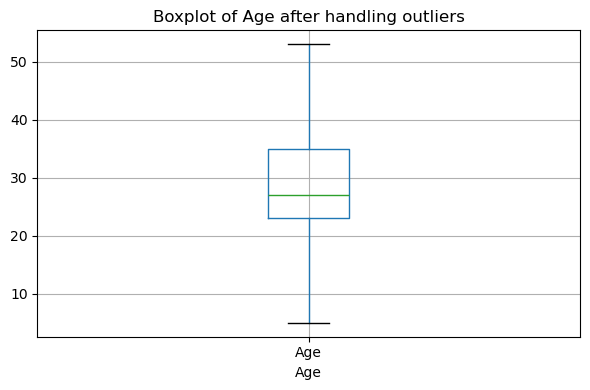

Outliers detected: 0
Lower extreme: 5.0
Upper extreme: 53.0


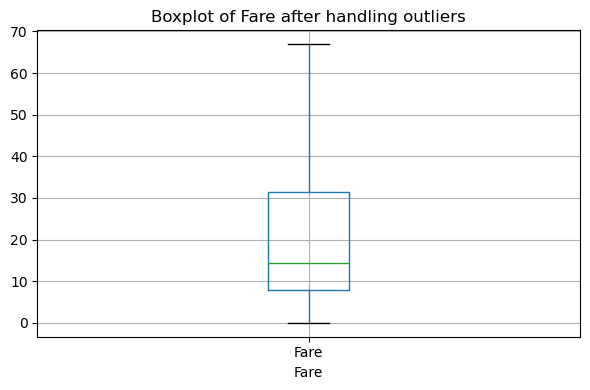

Outliers detected: 0
Lower extreme: -27.5105
Upper extreme: 66.9063


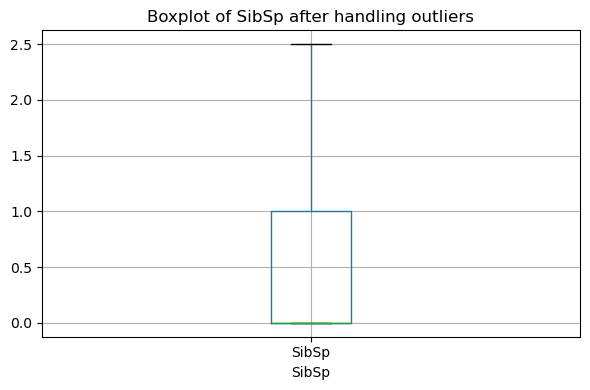

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 2.5


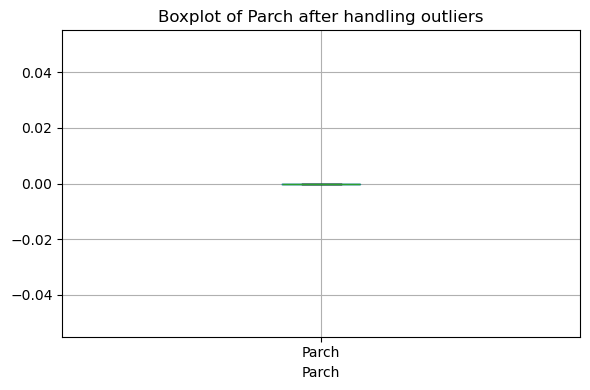

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


In [183]:
# plotting boxplots to check the presence of outliers after handling them.

for col in n_cols:
    s = test_cleaned[col]
  # finding outliers by iqr
    Q1 = s.quantile(0.25) # determining q1
    Q3 = s.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = s[(s < lower_extreme) | (s > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    test_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [184]:
# encoding categorical variables
cat_cols=test_cleaned.select_dtypes(include=["object"]).columns # selecting only categorical columns
# Applying one-hot encoding
test_cleaned = pd.get_dummies(test_cleaned, columns=cat_col).astype(int)

# displaying the transformed dataset
test_cleaned.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34,0,0,7,0,1,0,1,0
1,3,47,1,0,7,1,0,0,0,1
2,2,53,0,0,9,0,1,0,1,0
3,3,27,0,0,8,0,1,0,0,1
4,3,22,1,0,12,1,0,0,0,1


In [185]:
yt_pred=classifier.predict(test_cleaned)
yt_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [186]:
classifier.predict_proba(test_cleaned)

array([[0.8942243 , 0.1057757 ],
       [0.69275299, 0.30724701],
       [0.85865915, 0.14134085],
       [0.90661796, 0.09338204],
       [0.45385876, 0.54614124],
       [0.85361798, 0.14638202],
       [0.35004641, 0.64995359],
       [0.80448274, 0.19551726],
       [0.24894349, 0.75105651],
       [0.93476908, 0.06523092],
       [0.90710682, 0.09289318],
       [0.68880601, 0.31119399],
       [0.07111146, 0.92888854],
       [0.92262948, 0.07737052],
       [0.16653389, 0.83346611],
       [0.15635935, 0.84364065],
       [0.74819884, 0.25180116],
       [0.83347373, 0.16652627],
       [0.50941956, 0.49058044],
       [0.48561706, 0.51438294],
       [0.68920974, 0.31079026],
       [0.83259855, 0.16740145],
       [0.07113582, 0.92886418],
       [0.30725871, 0.69274129],
       [0.11544137, 0.88455863],
       [0.97032166, 0.02967834],
       [0.03316275, 0.96683725],
       [0.83878507, 0.16121493],
       [0.64050504, 0.35949496],
       [0.92248302, 0.07751698],
       [0.

In [187]:
# 4. model evaluation
#Classification report (perfomance of the model with the test data)
#To evaluate a model (accuracy, precision, etc.), we need true labels (Survived) column for the test set. But the Titanic_test.csv file does not contain the Survived column. if you want to use the survived column of titanic.train csv it has 889 rows where as the titanic.test csv has only 441 rows , so when you are tryig to evaluate the model perforance it is giving an error as lenght doesnt match [889,441]
#Therefore, we can only predict, not evaluate.
# roc curve is also not possible without the survived column(true label)

In [188]:
# 5. Interpretting the coefficients of the logistic regression model.
classifier.coef_

array([[-1.05543416, -0.03876694, -0.35727601,  0.        ,  0.00578791,
         1.29750848, -1.30089485,  0.15086312,  0.13064662, -0.28489612]])

In [189]:
classifier.intercept_

array([3.47947537])

In [1]:
#  significance of features in predicting the target variable.

# Sex_female (+1.2975)	Strongest positive effect — being female increases survival probability significantly.
# Sex_male (–1.3009) Strong negative effect — being male reduces survival probability.
# Pclass (–1.0554) Passengers in lower class (higher Pclass value) were less likely to survive.
# Age (–0.0388) Older passengers were less likely to survive, but the effect is small.
# SibSp	(–0.3573) Having more siblings/spouses slightly reduces survival.
# Parch	(0.0000) No meaningful effect on survival in this model.
# Fare (+0.0058) Paying higher fare (likely wealthier) slightly increases survival odds.
# Embarked_C (+0.1509) Passengers who boarded at Cherbourg had slightly higher survival chances.
# Embarked_Q (+0.1306) Slight positive effect, boarding at Queenstown was slightly better than Southampton.
# Embarked_S (–0.2849) Passengers from Southampton had lower survival probability.

# thus we can conclude that Parch (parents/children aboard) has no effect in this model, it can be dropped and if dropped it wont affect the performance of the model.

In [ ]:
# Interview Questions:
# 1. What is the difference between precision and recall?
# Precision and recall are two key evaluation metrics used in classification tasks.
# precision is the proportion of predicted positive cases that are actually positive.
# precision = true positives/ (true positives + false positives)

# recall: The proportion of actual positive cases that were correctly predicted.
# recall= true positives / ( true positves + false negatives)

# 2. What is cross-validation, and why is it important in binary classification?
# cross validation is a technique to evaluate model performance by splitting data into multiple subsets (folds) and testing the model across these folds.
# it is important in binary classification because :
# it prevents overfitting
#  it handles class imbalance